In [16]:
words=open('names.txt','r').read().splitlines()

In [18]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [13]:
#Iterate over all the names in txt file one by one and then for name iterate in pair of two , so ch1 = currName[i] and ch2=currName[i+1] if i crosses length then that iteration is ignored. We want to find frequency map of two characters coming together in pair to build bigram model

In [20]:
b = {}
for w in words:
    chs = ['<S>']+list(w)+['<E>'] # S and E added to mark start and end of two names in names.txt
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram=(ch1, ch2)
        b[bigram]=b.get(bigram,0)+1

In [17]:
b

{('<S>', 'e'): 1531,
 ('e', 'm'): 769,
 ('m', 'm'): 168,
 ('m', 'a'): 2590,
 ('a', '<E>'): 6640,
 ('<S>', 'o'): 394,
 ('o', 'l'): 619,
 ('l', 'i'): 2480,
 ('i', 'v'): 269,
 ('v', 'i'): 911,
 ('i', 'a'): 2445,
 ('<S>', 'a'): 4410,
 ('a', 'v'): 834,
 ('v', 'a'): 642,
 ('<S>', 'i'): 591,
 ('i', 's'): 1316,
 ('s', 'a'): 1201,
 ('a', 'b'): 541,
 ('b', 'e'): 655,
 ('e', 'l'): 3248,
 ('l', 'l'): 1345,
 ('l', 'a'): 2623,
 ('<S>', 's'): 2055,
 ('s', 'o'): 531,
 ('o', 'p'): 95,
 ('p', 'h'): 204,
 ('h', 'i'): 729,
 ('<S>', 'c'): 1542,
 ('c', 'h'): 664,
 ('h', 'a'): 2244,
 ('a', 'r'): 3264,
 ('r', 'l'): 413,
 ('l', 'o'): 692,
 ('o', 't'): 118,
 ('t', 't'): 374,
 ('t', 'e'): 716,
 ('e', '<E>'): 3983,
 ('<S>', 'm'): 2538,
 ('m', 'i'): 1256,
 ('a', 'm'): 1634,
 ('m', 'e'): 818,
 ('<S>', 'h'): 874,
 ('r', 'p'): 14,
 ('p', 'e'): 197,
 ('e', 'r'): 1958,
 ('r', '<E>'): 1377,
 ('e', 'v'): 463,
 ('v', 'e'): 568,
 ('l', 'y'): 1588,
 ('y', 'n'): 1826,
 ('n', '<E>'): 6763,
 ('b', 'i'): 217,
 ('i', 'g'): 428,


In [22]:
sorted(b.items(),key = lambda kv: -kv[1]) # freq map of two characters coming togetger in name

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [33]:
pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 MB 32.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 40.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: sympy
    Found existing installation: sympy 1.12
    Uninstalling sympy-1.12:
      Successfully uninstalled sympy-1.12
Note: you may need to restart the kernel to use updated packages.


In [4]:
import torch

In [69]:
charAjacenyList =  torch.zeros((27,27), dtype=torch.int32) # for a name with chars at index i,j we assume a directed edge from i to j
        #this is how we build adjacency list for all the chars present in all the name in names.txt

In [82]:
chars = sorted(list(set(''.join(words))))
charIntIndexMapping = {s:i+1 for i,s in enumerate(chars)}
charIntIndexMapping['.'] = 0 #Initially we have appended <S> and <E> to denote start and end of indivisual name in names.txt 
#but because of this we have one additional row representing all the edges which start from char <E> to any char j which is not possible 
# and one additional column which represent all the edges which are starting from any char i to <S> which is not possible 
#Hence we are simply appeding "." to mark start and end of indivisual name there by size of adj list is 27x27 instead of 28x28(Had we used <S> and<E>
charIntIndexMapping

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [83]:
indexToCharMapping ={i:s for s,i in charIntIndexMapping.items()}
indexToCharMapping

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [84]:
for w in words:
    chs = ['.']+list(w)+['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        indexOfCh1 = charIntIndexMapping[ch1]
        indexOfCh2 = charIntIndexMapping[ch2]
        charAjacenyList[indexOfCh1][indexOfCh2] += 1 # for a name with chars at index i,j we assume a directed edge from i to j
        #this is how we build adjacency list for all the chars present in all the name in names.txt
       

In [85]:
charAjacenyList

tensor([[ 556, 4951, 1776, 2584, 2382, 1665,  585, 3001, 2524,  766, 2990, 5491,
         3206, 7976, 1209,  476,  575, 3356, 2757, 2742, 1689,  912,  537,  489,
         2184,  970, 7569],
        [6961,  594,  542,  535, 1697,  692,  134,  209, 2549, 1651,  175,  671,
         2528, 1638, 5543,   63,   82,  902, 3272, 1120,  732,  381,  834,  161,
          265, 2050,  549],
        [ 929,  321,   80,    2,  616,  655,    2,  664,  312,  220,  317,  116,
          103,    0,  384,  106,   11,   76,  847,   43,   37,   45,    0,    3,
          104,   87,   97],
        [1400,  816,    3,  191, 1284,  556,   25,  120, 1338,  280,    6,  376,
          146,   31,  378,  380,    2,  435,  105,    9,  127,   52,   23,    0,
          320,  105,  520],
        [1195, 1424,  154,  387, 1420, 1365,  130,  177,  936,  729,  187, 3251,
          829, 2705,  300,  461,   14, 1959, 1285,  609,   73,  555,   67,  155,
         1070,  498, 3984],
        [4225,  679,  121,  153,  507, 1315,   83,

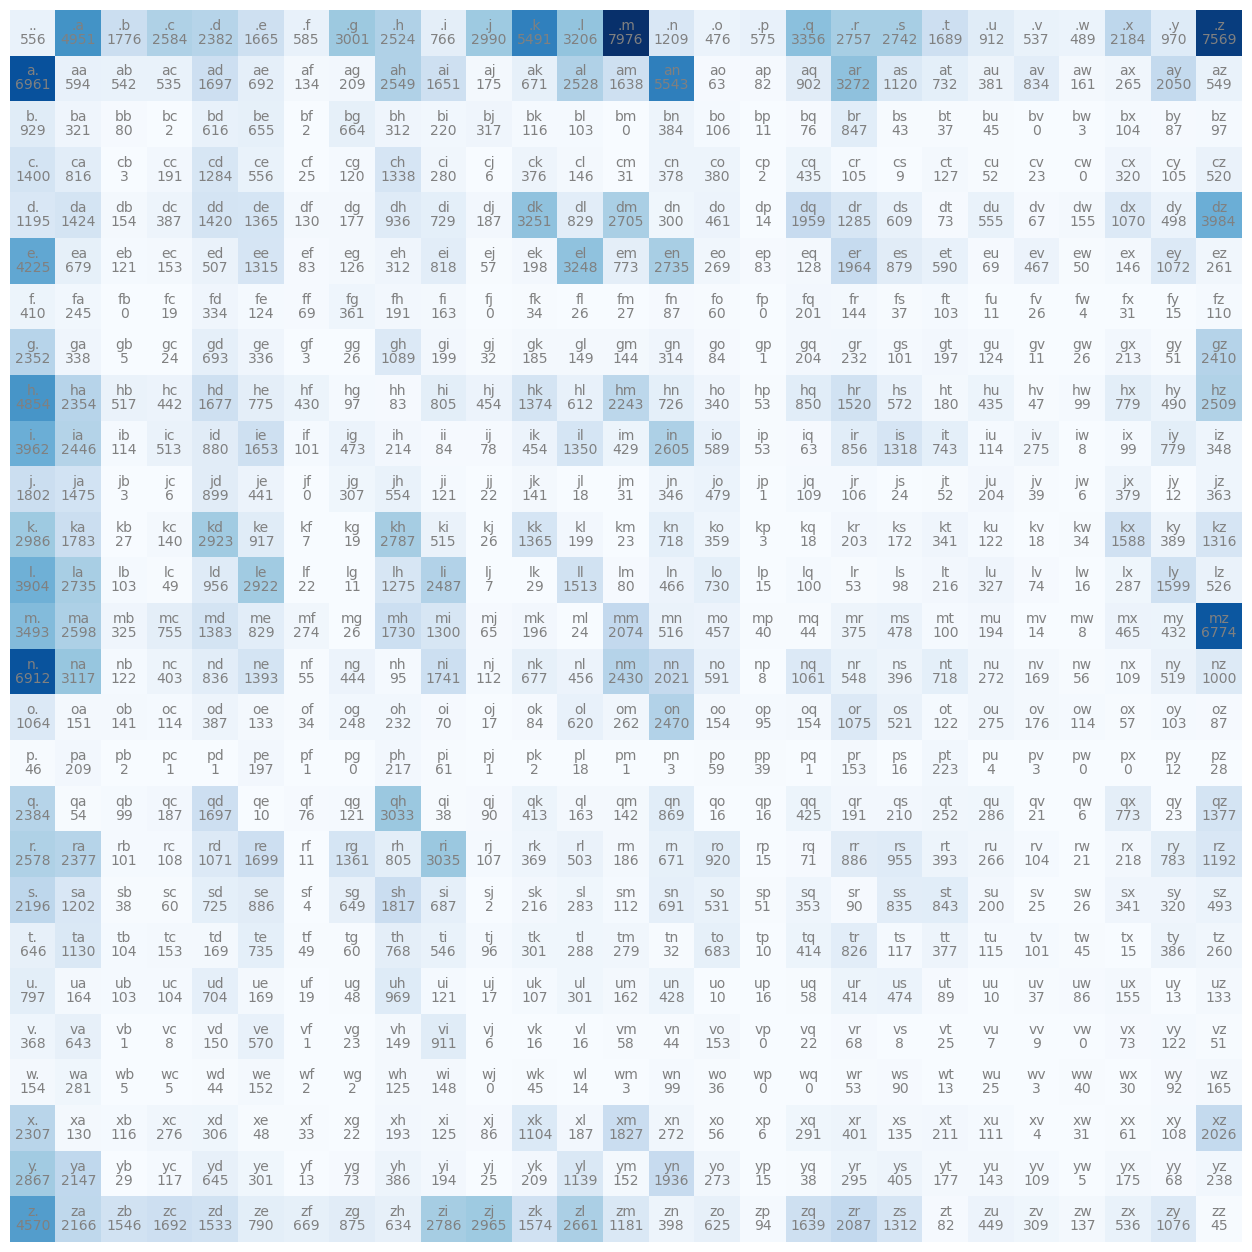

In [86]:
import matplotlib.pyplot as plt #visualising the adjaceny list created from chars of name in names.txt
%matplotlib inline 


plt.figure(figsize=(16,16))
plt.imshow(charAjacenyList, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = indexToCharMapping[i] + indexToCharMapping[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, charAjacenyList[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [93]:
charAjacenyList[0,:] #this represents 0th row which means edge from "."-> first char of each name in names.txt

tensor([ 556, 4951, 1776, 2584, 2382, 1665,  585, 3001, 2524,  766, 2990, 5491,
        3206, 7976, 1209,  476,  575, 3356, 2757, 2742, 1689,  912,  537,  489,
        2184,  970, 7569], dtype=torch.int32)

In [95]:
p = charAjacenyList[0,:].float()
p = p/p.sum() 
p #this represents the probability of name starting with each char represented by j-index because 0th row represent edge from "." to first char each name in names.txt

tensor([0.0084, 0.0751, 0.0269, 0.0392, 0.0361, 0.0253, 0.0089, 0.0455, 0.0383,
        0.0116, 0.0454, 0.0833, 0.0486, 0.1210, 0.0183, 0.0072, 0.0087, 0.0509,
        0.0418, 0.0416, 0.0256, 0.0138, 0.0081, 0.0074, 0.0331, 0.0147, 0.1148])

In [97]:
#Torch Multinomial: You give me probabilities and i will give you integers 

tensor(1.)